# EXAMEN ARGUMENTATIVO II: Problema 6
Autor: César Sánchez Guajardo 

Matricula: A00572573

Fecha: Miércoles 30 de Abril del 2025

## Librerias

In [1]:
import umap
import numpy as np
import sklearn
import kmapper as km
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
import webbrowser



## Planteamiento del problema y Metodología:

**Planteamiento del problema:** En Mario Kart 8 Deluxe, el rendimiento de un jugador depende de la combinación de cuatro componentes clave: conductor, cuerpo del kart, llantas y ala delta. Cada uno aporta distintas características como aceleración, tracción y velocidad en distintos terrenos. Ante una gran cantidad de combinaciones posibles, surge la necesidad de identificar aquellas que tienen mayor probabilidad de garantizar el mejor rendimiento en carrera.

**Preguntas clave:** 
- ¿Qué combinaciones tienen el mejor rendimiento general en carrera?
- ¿Existen combinaciones balanceadas que funcionen bien en cualquier situación o estilo de juego?
- ¿Qué opciones pueden brindar una experiencia más divertida o retadora al jugar con personas de diferentes niveles?
- ¿Cómo se puede elegir una combinación que garantice igualdad de condiciones entre los jugadores?


**Metodología:** Para identificar las combinaciones más efectivas en Mario Kart 8 Deluxe, se utilizaron técnicas de Topological Data Analysis (TDA), específicamente el algoritmo Mapper, debido a su capacidad para detectar patrones complejos en datos de alta dimensión y visualizar su estructura de forma intuitiva.

## Leemos la base de datos

In [2]:
bodies_karts=pd.read_csv('archive/bodies_karts.csv',delimiter=";")
drivers=pd.read_csv('archive/drivers.csv',delimiter=";")
gliders=pd.read_csv('archive/gliders.csv',delimiter=";")
tires=pd.read_csv('archive/tires.csv',delimiter=";")

## Unificación de bases de datos
Durante esta parte unificaremos la base de datos con base al código de kaggle https://www.kaggle.com/datasets/marlowspringmeier/mario-kart-8-deluxe-ingame-statistics/code (MARLOW SPRINGMEIER, 2021)

Este código nos ayuda a:
- Agrupar los drivers, bodies, gliders y tires similares para agruparlos como si fueran uno mismo, de esta manera reducimos la base de datos y le quitamos similitudes innecesarias
- Generar nuevas columnas como "Overall"

In [3]:

features = ['Weight','Acceleration','On-Road traction','Off-Road Traction','Mini-Turbo',
            'Ground Speed','Water Speed','Anti-Gravity Speed','Air Speed','Ground Handling',
            'Water Handling','Anti-Gravity Handling','Air Handling']


In [4]:
grouped_features = ['Total Grip','Total Speed','Total Handling']
grouped_features_avg = ['Avg Grip','Avg Speed','Avg Handling']
unique_features = ['Weight', 'Acceleration','Mini-Turbo']

In [5]:
bodies_karts = bodies_karts.sort_values(by=features, ignore_index=True)


In [6]:
df_groups = pd.DataFrame()
df_groups['Name'] = bodies_karts['Body']
df_groups["Part"] = "Body"
grouped_bodies = ['Falcon-Buggy','Falcon-Buggy',
                       'Landship-Streetle','Landship-Streetle',
                       'Buggy-Scooty','Buggy-Scooty',
                       'Prancer-Bikes','Prancer-Bikes','Prancer-Bikes',
                       'Bike-Flame-Wiggler-Arrow','Bike-Flame-Wiggler-Arrow',
                       'Bike-Flame-Wiggler-Arrow','Bike-Flame-Wiggler-Arrow',
                       'Frame-Varmint-Tripper','Frame-Varmint-Tripper',
                       'Frame-Varmint-Tripper','Sneeker-Gold-Master',
                       'Sneeker-Gold-Master', 'Sneeker-Gold-Master',
                       'Standard-Duke-Roadster','Standard-Duke-Roadster',
                       'Standard-Duke-Roadster','Cat-Comet-Yoshi-Teddy',
                       'Cat-Comet-Yoshi-Teddy', 'Cat-Comet-Yoshi-Teddy',
                       'Cat-Comet-Yoshi-Teddy','Circuit-Dasher-Wing',
                       'Circuit-Dasher-Wing','Circuit-Dasher-Wing',
                       'Tanooki-Koopa','Tanooki-Koopa',
                       'March-Coupe-Inkstriker','Mach-Coupe-Inkstriker',
                       'March-Coupe-Inkstriker','Badwagon-ATV-GLA','Badwagon-ATV-GLA',
                       'Badwagon-ATV-GLA','Steel-Tri-Bone','Steel-Tri-Bone',
                       'Steel-Tri-Bone'
]
df_groups['Group'] = grouped_bodies
df_groups

,Name,Part,Group
0,Blue Falcon,Body,Falcon-Buggy
1,Splat Buggy,Body,Falcon-Buggy
2,Landship,Body,Landship-Streetle
3,Streetle,Body,Landship-Streetle
4,Biddybuggy,Body,Buggy-Scooty
5,Mr. Scooty,Body,Buggy-Scooty
6,Prancer,Body,Prancer-Bikes
7,Sport Bike,Body,Prancer-Bikes
8,Jet Bike,Body,Prancer-Bikes
9,Standard Bike,Body,Bike-Flame-Wiggler-Arrow


In [7]:
bodies = bodies_karts.copy()
bodies.drop_duplicates(features,inplace=True)
unique_bodies = bodies.sort_values(features)
bodies = unique_bodies.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Body"].drop_duplicates("Group")).reset_index(drop=True)
bodies['Body'] = unique_grouped['Group']
bodies

,Body,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Falcon-Buggy,0,3,1,3,3,4,2,4,3,2,3,5,1
1,Landship-Streetle,0,6,0,6,6,1,5,0,2,4,5,2,3
2,Buggy-Scooty,0,7,1,4,7,0,1,2,1,5,4,5,4
3,Prancer-Bikes,1,2,1,2,3,4,3,3,3,3,3,2,3
4,Bike-Flame-Wiggler-Arrow,1,5,3,5,5,2,2,4,3,4,3,4,3
5,Frame-Varmint-Tripper,1,6,3,4,6,1,3,1,1,5,4,4,2
6,Sneeker-Gold-Master,2,2,1,0,3,4,2,3,3,3,2,3,2
7,Standard-Duke-Roadster,2,4,3,3,4,3,3,3,3,3,2,3,3
8,Cat-Comet-Yoshi-Teddy,2,5,4,3,5,2,2,3,4,4,2,3,4
9,Circuit-Dasher-Wing,3,1,3,1,1,5,1,4,2,1,1,2,0


In [8]:
df_drivers = drivers.sort_values(features)

In [9]:
df_tmp = pd.DataFrame()
df_tmp['Name'] = df_drivers['Driver']
df_tmp["Part"] = "Driver"
grouped_drivers = ['BabyPrincesses', 'BabyPrincesses',
                   'BabyRosa-Lemmy', 'BabyRosa-Lemmy',
                   'BabyMario-Luigi-Bones','BabyMario-Luigi-Bones','BabyMario-Luigi-Bones',
                  'Koopa-Lakitu-Bowser', 'Koopa-Lakitu-Bowser', 'Koopa-Lakitu-Bowser',
                   'Toadette-Wendy-Isabelle','Toadette-Wendy-Isabelle','Toadette-Wendy-Isabelle',
                  'CatPeach-VillagerF-InklingG', 'CatPeach-VillagerF-InklingG', 'CatPeach-VillagerF-InklingG',
                   'Toad-Shy-Larry','Toad-Shy-Larry','Toad-Shy-Larry',
                  'Peach-Daisy-Yoshi','Peach-Daisy-Yoshi','Peach-Daisy-Yoshi',
                   'Tanooki-VillagerM-InklingB','Tanooki-VillagerM-InklingB','Tanooki-VillagerM-InklingB',
                  'Mario-Ludwig-MiiM','Mario-Ludwig-MiiM', 'Mario-Ludwig-MiiM',
                   'Luigi-Iggy', 'Luigi-Iggy',
                   'Rosa-Link-Boo','Rosa-Link-Boo','Rosa-Link-Boo',
                  'Donkey-Waluigi-Roy','Donkey-Waluigi-Roy', 'Donkey-Waluigi-Roy',
                   'Wario-DryBowser', 'Wario-DryBowser',
                   'Boswer-Morton','Boswer-Morton',
                  'Metal-Golds', 'Metal-Golds','Metal-Golds']
df_tmp['Group'] = grouped_drivers
df_groups = pd.concat([df_groups, df_tmp], ignore_index=True)


In [10]:
drivers = df_drivers.copy()
drivers.drop_duplicates(features,inplace=True)
unique_drivers = drivers.sort_values(features)
drivers = unique_drivers.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Driver"].drop_duplicates("Group")).reset_index(drop=True)
drivers['Driver'] = unique_grouped['Group']
drivers

,Driver,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,BabyPrincesses,0,4,3,5,5,0,0,0,0,10,10,10,10
1,BabyRosa-Lemmy,0,5,4,3,5,0,0,0,0,9,9,9,9
2,BabyMario-Luigi-Bones,1,5,2,4,4,1,1,1,1,8,8,8,8
3,Koopa-Lakitu-Bowser,2,4,1,5,4,2,2,2,2,8,8,8,8
4,Toadette-Wendy-Isabelle,2,5,4,2,4,2,2,2,2,7,7,7,7
5,CatPeach-VillagerF-InklingG,3,4,2,3,3,4,4,4,4,6,6,6,6
6,Toad-Shy-Larry,3,4,3,4,3,3,3,3,3,7,7,7,7
7,Peach-Daisy-Yoshi,4,3,3,3,3,5,5,5,5,5,5,5,5
8,Tanooki-VillagerM-InklingB,5,3,7,1,3,5,5,5,5,5,5,5,5
9,Mario-Ludwig-MiiM,6,2,4,2,2,6,6,6,6,4,4,4,4


In [11]:
df_gliders = gliders.sort_values(features)

In [12]:
df_tmp = pd.DataFrame()
df_tmp['Name'] = df_gliders['Glider']
df_tmp["Part"] = "Glider"
grouped_gliders = ['Cloud-Parachute-Flower-Paper', 'Cloud-Parachute-Flower-Paper',
                   'Cloud-Parachute-Flower-Paper', 'Cloud-Parachute-Flower-Paper',
                   'Super-Waddle-Hylian','Super-Waddle-Hylian','Super-Waddle-Hylian',
                   'Peach-Parafoil-Bowser-MKTV', 'Peach-Parafoil-Bowser-MKTV',
                   'Peach-Parafoil-Bowser-MKTV', 'Peach-Parafoil-Bowser-MKTV',
                   'Wario-Plane-Gold','Wario-Plane-Gold','Wario-Plane-Gold'
                  ]
df_tmp['Group'] = grouped_gliders
df_groups = pd.concat([df_groups, df_tmp], ignore_index=True)


In [13]:
gliders = df_gliders.copy()
gliders.drop_duplicates(features,inplace=True)
unique_gliders = gliders.sort_values(features)
gliders = unique_gliders.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Glider"].drop_duplicates("Group")).reset_index(drop=True)
gliders['Glider'] = unique_grouped['Group']
gliders

,Glider,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Cloud-Parachute-Flower-Paper,0,2,1,1,2,0,1,1,1,1,0,1,2
1,Super-Waddle-Hylian,1,1,1,1,1,1,1,0,2,1,0,1,1
2,Peach-Parafoil-Bowser-MKTV,1,2,2,0,2,0,0,1,1,1,1,0,2
3,Wario-Plane-Gold,2,1,2,0,1,1,0,1,2,1,1,0,1


In [14]:
df_tires = tires.sort_values(features)

In [15]:
df_tmp = pd.DataFrame()
df_tmp['Name'] = df_tires['Tire']
df_tmp["Part"] = "Tire"
grouped_tires = ['Button-Leaf','Button-Leaf',
                 'Roller-Azure', 'Roller-Azure',
                 'Sponge-Cushion', 'Sponge-Cushion',
                 'Slim-Wood-Crimson','Slim-Wood-Crimson','Slim-Wood-Crimson',
                 'Standards-GLA', 'Standards-GLA', 'Standards-GLA',
                 'Slicks', 'Slicks',
                 'OffRoads-Triforce', 'OffRoads-Triforce', 'OffRoads-Triforce',
                 'Metal-Gold', 'Metal-Gold',
                 'Monsters', 'Monsters']
df_tmp['Group'] = grouped_tires
df_groups = pd.concat([df_groups, df_tmp], ignore_index=True)

In [16]:
tires = df_tires.copy()
tires.drop_duplicates(features,inplace=True)
unique_tires = tires.sort_values(features)
tires = unique_tires.reset_index(drop=True)
unique_grouped = (df_groups[df_groups['Part'] == "Tire"].drop_duplicates("Group")).reset_index(drop=True)
tires['Tire'] = unique_grouped['Group']
tires

,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,Water Speed,Anti-Gravity Speed,Air Speed,Ground Handling,Water Handling,Anti-Gravity Handling,Air Handling
0,Button-Leaf,0,5,1,3,5,1,2,2,2,3,3,4,2
1,Roller-Azure,0,6,0,4,6,0,3,0,3,4,4,4,4
2,Sponge-Cushion,1,4,2,6,4,1,1,1,4,2,1,2,3
3,Slim-Wood-Crimson,2,2,4,1,2,3,2,4,2,4,4,3,4
4,Standards-GLA,2,4,2,5,3,2,3,2,3,3,3,3,3
5,Slicks,3,1,4,0,0,4,0,4,0,2,0,2,1
6,OffRoads-Triforce,3,3,3,6,1,3,4,2,1,1,1,2,2
7,Metal-Gold,4,0,1,2,0,4,3,1,2,2,2,1,0
8,Monsters,4,2,3,7,2,2,2,2,1,0,1,0,1


In [17]:
parts = ['Driver','Body','Glider','Tire']
df_combined = pd.DataFrame(columns = parts + features)
df_combined[grouped_features] = 0
df_combined[['Overall']]  = 0

i = 0
for index, driver in drivers.iterrows():
    driver_name = driver['Driver']
    for index2, body in bodies.iterrows():
        body_name = body['Body']
        for index3, glider in gliders.iterrows():
            glider_name = glider['Glider']
            for index4, tire in tires.iterrows():
                tire_name = tire['Tire']
                df_combined.loc[i, parts]= [driver_name, body_name, glider_name, tire_name]
                df_combined.loc[i, features] = driver[features]+body[features]+glider[features]+tire[features]
                df_combined.loc[i, 'Overall'] = driver[features].sum()+body[features].sum()+glider[features].sum()+tire[features].sum()
                i = i+1

df_combined['Total Grip'] = df_combined['On-Road traction'] + df_combined['Off-Road Traction']
df_combined['Total Speed'] = df_combined['Ground Speed'] + df_combined['Water Speed'] + df_combined['Anti-Gravity Speed'] + df_combined['Air Speed']
df_combined['Total Handling'] = df_combined['Ground Handling'] + df_combined['Water Handling']  + df_combined['Anti-Gravity Handling'] + df_combined['Air Handling']
df_combined['Avg Grip'] = df_combined['Total Grip'] / 3
df_combined['Avg Speed'] = df_combined['Total Speed'] / 4
df_combined['Avg Handling'] = df_combined['Total Handling'] / 4
df_combined.tail()

,Driver,Body,Glider,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,...,Water Handling,Anti-Gravity Handling,Air Handling,Total Grip,Total Speed,Total Handling,Overall,Avg Grip,Avg Speed,Avg Handling
8059,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Standards-GLA,18,7,13,9,7,15,...,12,7,8,22,57,35,146.0,7.333333,14.25,8.75
8060,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Slicks,19,4,15,4,4,17,...,9,6,6,19,55,28,129.0,6.333333,13.75,7.0
8061,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,OffRoads-Triforce,19,6,14,10,5,16,...,10,6,7,24,57,29,140.0,8.0,14.25,7.25
8062,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Metal-Gold,20,3,12,6,4,17,...,11,5,5,18,57,28,130.0,6.0,14.25,7.0
8063,Metal-Golds,Badwagon-ATV-GLA,Wario-Plane-Gold,Monsters,20,5,14,11,6,15,...,10,4,6,25,54,25,135.0,8.333333,13.5,6.25


## Creación de mapper
Con base a la base de datos que nos entrego el codigo de Marlow, sacamos `df_combined` y con ese estaremos trabajando para lograr crear nuevas propiedades que nos ayuden a definir a él o los mejores personajes dependiendo de como quieras jugar


In [18]:
df=df_combined
df.columns

Index(['Driver', 'Body', 'Glider', 'Tire', 'Weight', 'Acceleration',
       'On-Road traction', 'Off-Road Traction', 'Mini-Turbo', 'Ground Speed',
       'Water Speed', 'Anti-Gravity Speed', 'Air Speed', 'Ground Handling',
       'Water Handling', 'Anti-Gravity Handling', 'Air Handling', 'Total Grip',
       'Total Speed', 'Total Handling', 'Overall', 'Avg Grip', 'Avg Speed',
       'Avg Handling'],
      dtype='object')

### Categorizamos propiedades
Categorizamos nuestro dataframe entre **categoricos** y **numericos**

In [19]:
categorical_data = df[['Driver', 'Body', 'Glider', 'Tire']]
numerical_data = df[['Weight', 'Acceleration',
       'On-Road traction', 'Off-Road Traction', 'Mini-Turbo', 'Ground Speed',
       'Water Speed', 'Anti-Gravity Speed', 'Air Speed', 'Ground Handling',
       'Water Handling', 'Anti-Gravity Handling', 'Air Handling', 'Total Grip',
       'Total Speed', 'Total Handling', 'Overall', 'Avg Grip', 'Avg Speed',
       'Avg Handling']]

### Creación columna nueva
Creamos una nueva columna llamada *"Above 70 Count"* para ayudar a visualizar y tomar decisiones en el Mapper. Esta columna cuenta cuántas de las propiedades de cada combinación superan el 70% de su respectivo percentil, comparándolas con todas las demás combinaciones.

In [20]:
percentile = numerical_data.quantile(0.70)
def count_above_70_percentile(row, percentile):
    count = 0
    for col in percentile.index:
        if row[col] > percentile[col]:
            count += 1
    return count



In [21]:
numerical_data['Above 70 Count'] = numerical_data.apply(lambda row: count_above_70_percentile(row, percentile), axis=1)

/var/folders/6h/nf6jxxkx3c98vxmkgwqt8jzw0000gn/T/ipykernel_39265/803606302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Above 70 Count'] = numerical_data.apply(lambda row: count_above_70_percentile(row, percentile), axis=1)


### Escalar los datos
Escalamos los datos utilizando *StandardScaler* para estandarizarlos y así construir el grafo con mayor precisión, evitando sesgos causados por diferencias en las escalas de las variables.



In [22]:
from sklearn.preprocessing import StandardScaler

# Creamos el scaler
scaler = StandardScaler()

# Normalizamos todas las columnas numéricas con media 0 y desviación estándar 1
numerical_data = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_data.columns, index=numerical_data.index)


### Inicializamos el Mapper y el PCA

In [23]:
mapper = km.KeplerMapper(verbose=1)

filtro_densidad = PCA(n_components=2).fit_transform(numerical_data)
# o

KeplerMapper(verbose=1)


Creamos el gráfico de mapper

In [24]:
# Grafo topológico
graph = mapper.map(
    filtro_densidad,
    numerical_data,
    clusterer=sklearn.cluster.DBSCAN(metric="cosine"),
    cover=km.Cover(n_cubes=15, perc_overlap=0.2),
)

Mapping on data shaped (8064, 21) using lens shaped (8064, 2)

Creating 225 hypercubes.

Created 513 edges and 163 nodes in 0:00:00.142602.


In [25]:
df = pd.concat([categorical_data, numerical_data], axis=1)

Vamos a visualizar dos grafos, ambos construidos con los mismos parámetros de estructura (nodos y conexiones), pero coloreados de manera diferente para comparar sus propiedades:
1. **Coloreamos con base a *"Overall"***: 
- Cada nodo representa es un conjunto de combinaciones.
- El color del nodo es más oscuro si el coche tiene un mejor desempeño general (Overall Score), es decir, si la suma total de sus atributos es alta.
2. **Coloreamos con base a *"Above 70 Count"***: 
- Nuevamente, cada nodo es un conjunto de combinaciones.
- Esta vez, el color es más oscuro si el coche tiene muchas características individuales con puntuaciones mayores a 70, indicando que destaca en varias áreas específicas.

**Objetivo del análisis:**
- Comparar ambos grafos visualmente para ver si hay patrones similares en la distribución de colores.
- Identificar nodos que sobresalgan en ambos criterios (tanto en desempeño general como en atributos sobresalientes).

Escoger un nodo representativo que tenga un buen rendimiento en ambas métricas y analizarlo más a fondo para dar recomendaciones de combinaciones efectivas.

**Coloreamos con base a *"Overall"***

In [26]:
# Etiquetas para el mapper
df['Combo'] = df['Driver'] + " / " + df['Body']+ " / " + df['Glider']+ " / " + df['Tire']

# Visualización usando 'Above 70% Count' como color
mapper.visualize(
    graph,
    color_values=df['Overall'].values,
    color_function_name="mean",  # <-- Este faltaba
    path_html="MarioKart_Overall.html",
    title="Datos Combos Mario Carreras - Overall",
    colorscale=None,
    nbins=15,
    node_color_function="mean",  # Esto también puede mantenerse para consistencia
    custom_tooltips=df['Above 70 Count'].values,
)



webbrowser.open("MarioKart_Overall.html")

Wrote visualization to: MarioKart_Overall.html


True

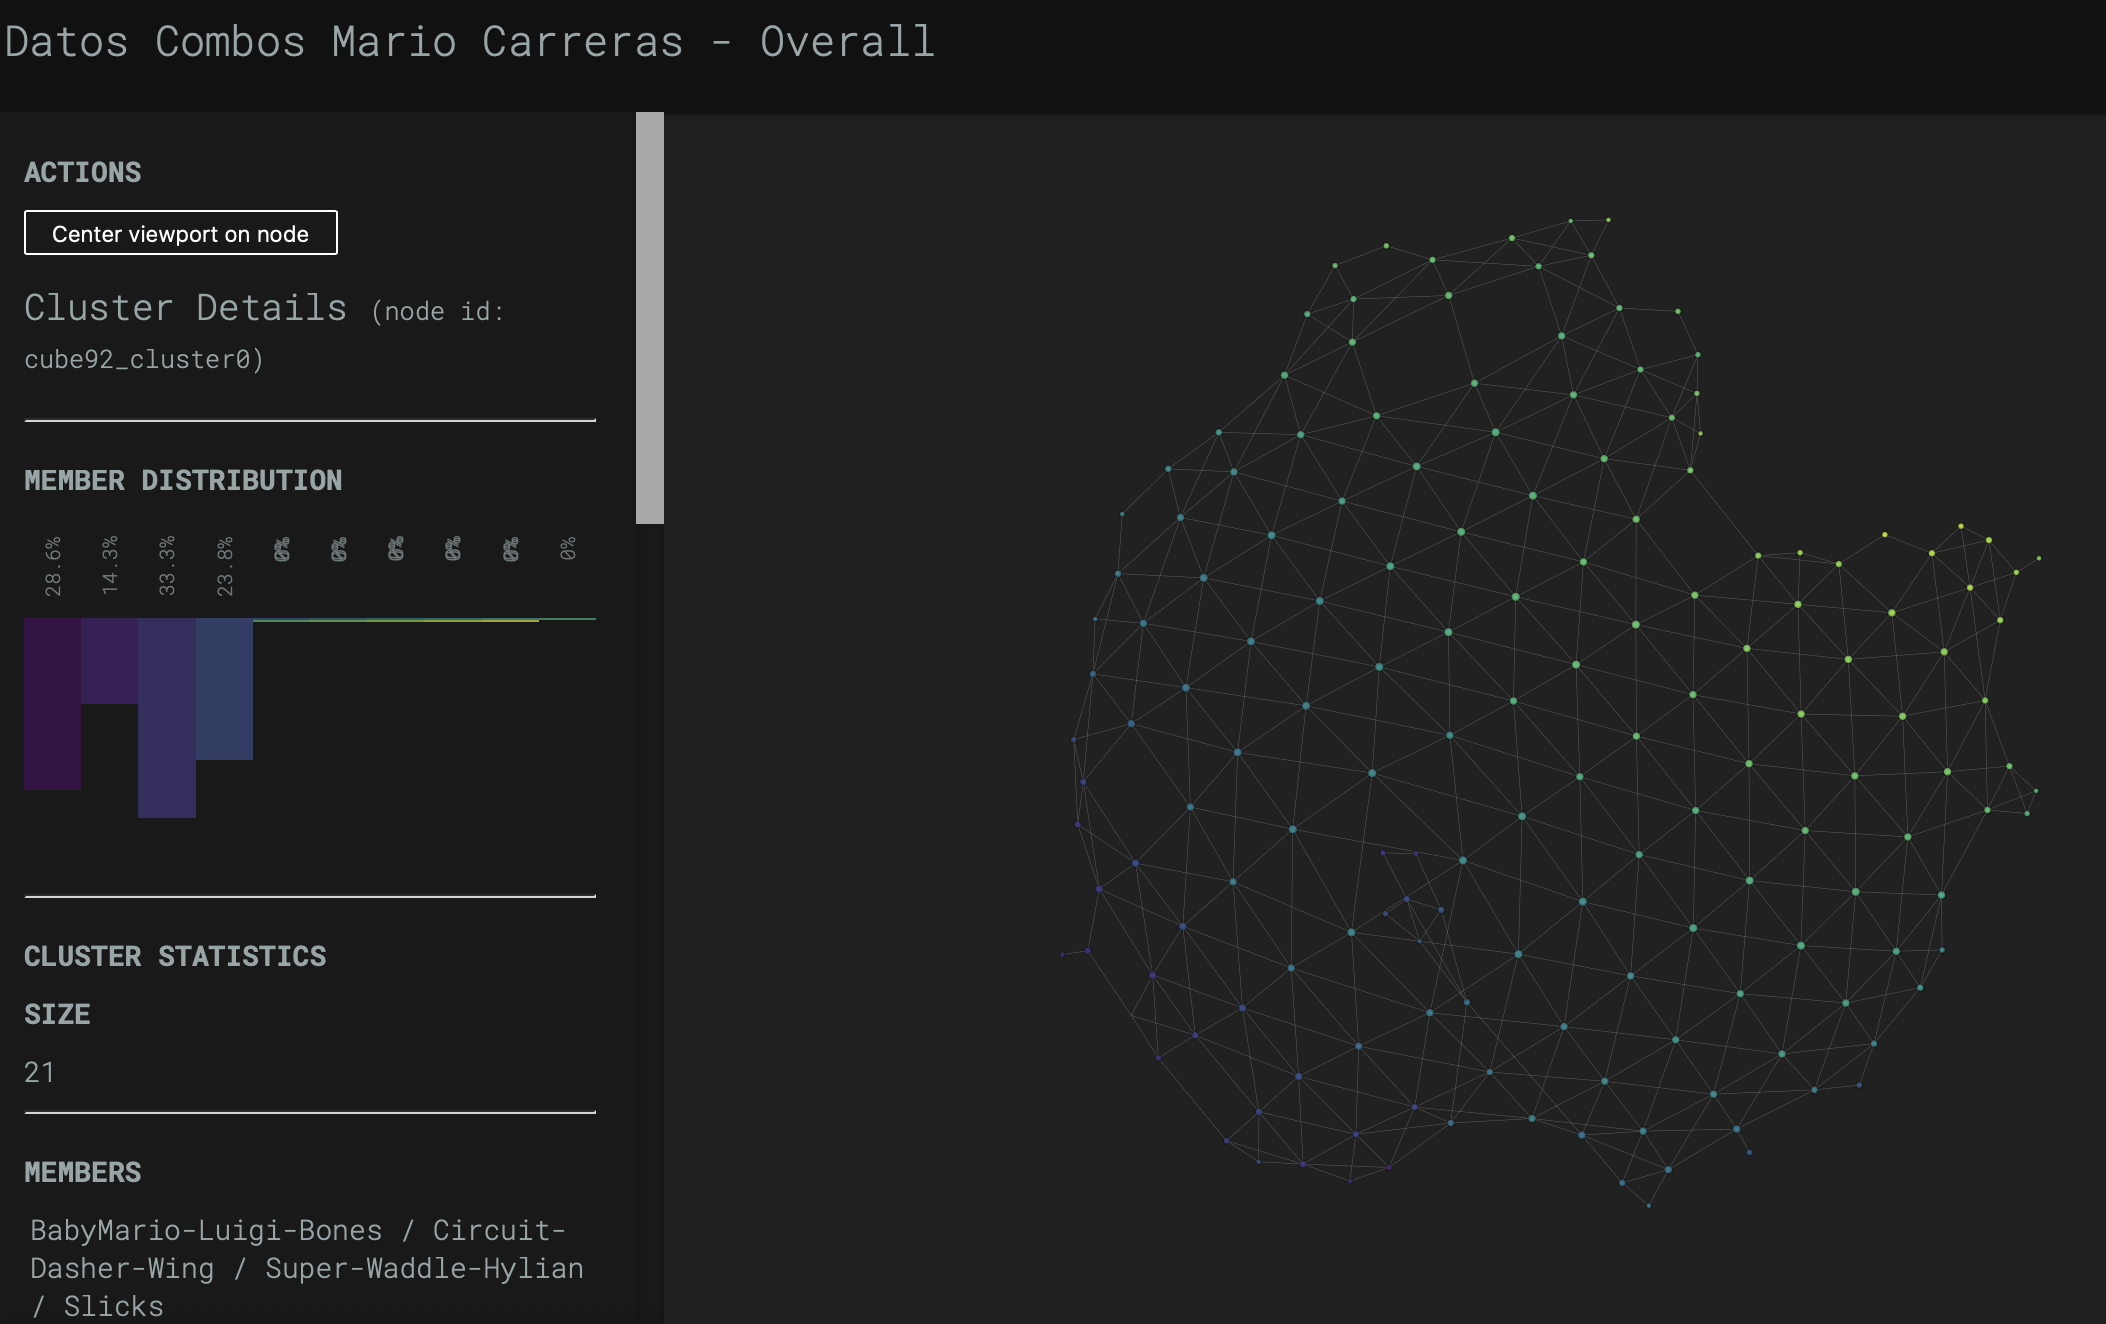

**Coloreamos con base a *"Above 70 Count"***

In [27]:
# Etiquetas para el mapper
df['Combo'] = df['Driver'] + " / " + df['Body']+ " / " + df['Glider'] + " / " + df['Tire']

# Visualización usando 'Above 70% Count' como color
mapper.visualize(
    graph,
    color_values=df['Above 70 Count'].values,
    color_function_name="mean",  # <-- Este faltaba
    path_html="MarioKart_MejoresCualidades.html",
    title="Datos Combos Mario Carreras - Mejores Cualidades",
    colorscale=None,
    nbins=15,
    node_color_function="mean",  # Esto también puede mantenerse para consistencia
    custom_tooltips=df['Combo'].values,
)



webbrowser.open("MarioKart_MejoresCualidades.html")

Wrote visualization to: MarioKart_MejoresCualidades.html


True

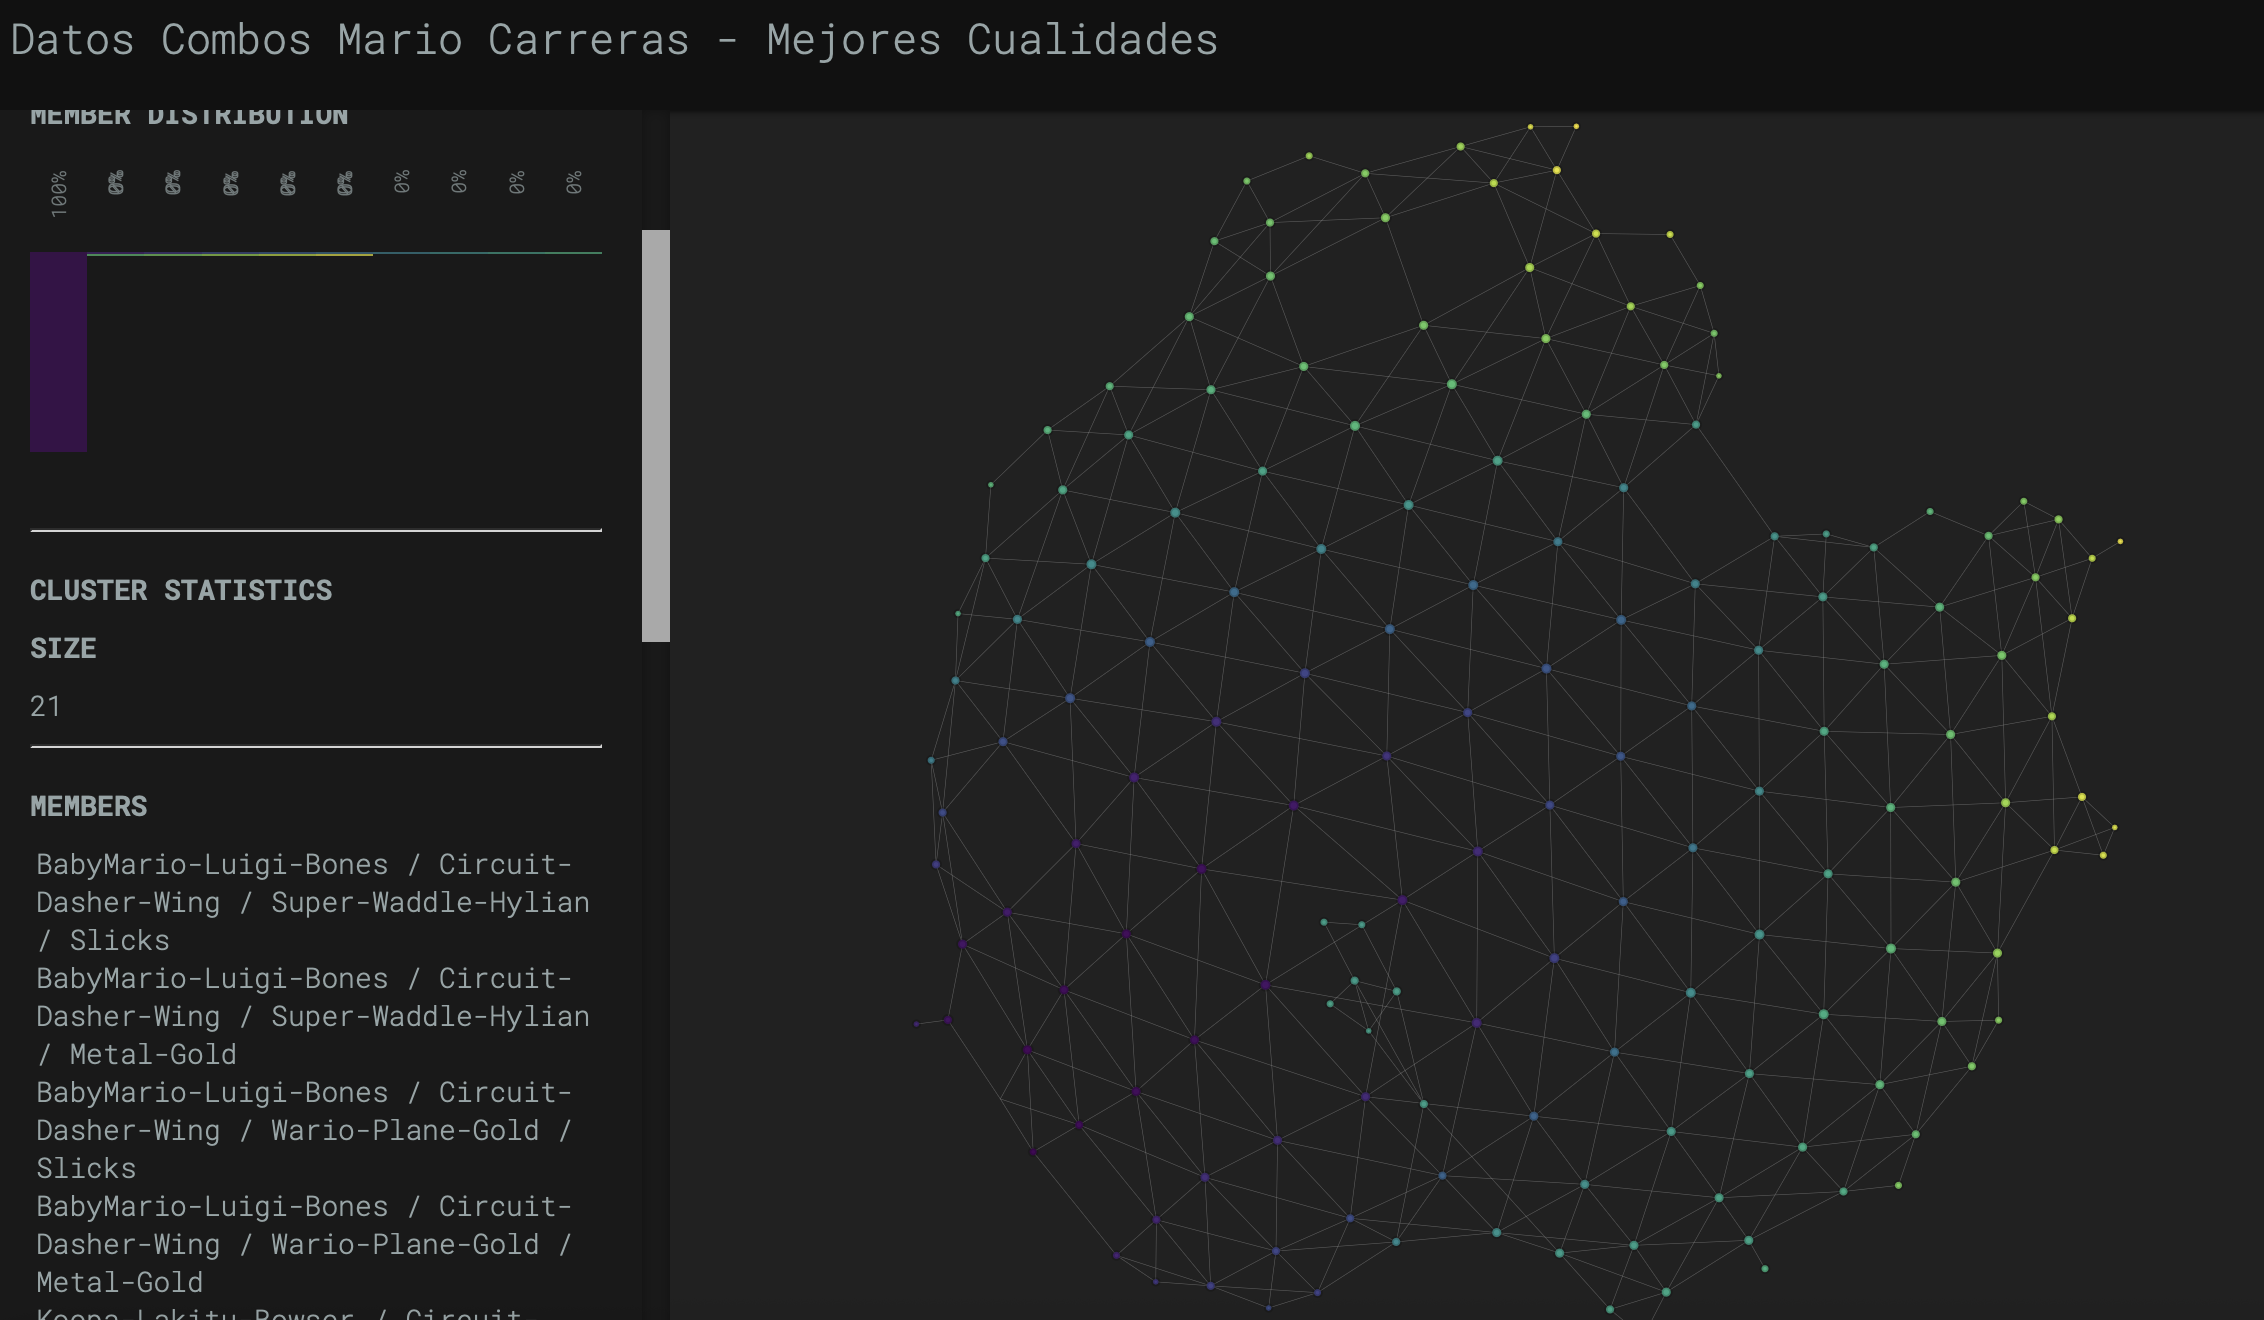

### Analisis de Grafos Mapper

**Las mejores combinaciones:** A partir de ambos grafos identificamos el nodo número 42 como el de color más amarillo en común. Dentro de este nodo se encuentran 18 combinaciones que ofrecen las mejores características generales para ganar en Mario Kart. Estas combinaciones destacan por tener un balance sólido en múltiples atributos, lo que las hace ideales para cualquier estilo de juego, además de tener la mayoria de sus cualidades por arriba de las demás combinaciones.



In [28]:
indices=graph["nodes"]['cube42_cluster0']
df_combined.iloc[indices].sort_values(by='Overall',ascending=False) #Ejemplo de Combinaciónes buenas

,Driver,Body,Glider,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,...,Water Handling,Anti-Gravity Handling,Air Handling,Total Grip,Total Speed,Total Handling,Overall,Avg Grip,Avg Speed,Avg Handling
7986,Metal-Golds,March-Coupe-Inkstriker,Wario-Plane-Gold,Slim-Wood-Crimson,17,7,16,6,8,15,...,10,10,10,22,62,40,156.0,7.333333,15.5,10.0
6474,Donkey-Waluigi-Roy,March-Coupe-Inkstriker,Wario-Plane-Gold,Slim-Wood-Crimson,15,7,18,5,8,16,...,9,9,9,23,66,36,155.0,7.666667,16.5,9.0
7968,Metal-Golds,March-Coupe-Inkstriker,Super-Waddle-Hylian,Slim-Wood-Crimson,16,7,15,7,8,15,...,9,11,10,22,62,40,155.0,7.333333,15.5,10.0
6456,Donkey-Waluigi-Roy,March-Coupe-Inkstriker,Super-Waddle-Hylian,Slim-Wood-Crimson,14,7,17,6,8,16,...,8,10,9,23,66,36,154.0,7.666667,16.5,9.0
6717,Wario-DryBowser,Bike-Flame-Wiggler-Arrow,Peach-Parafoil-Bowser-MKTV,Slim-Wood-Crimson,13,9,14,7,9,15,...,9,8,10,21,64,37,153.0,7.0,16.0,9.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,Rosa-Link-Boo,Mach-Coupe-Inkstriker,Peach-Parafoil-Bowser-MKTV,Sponge-Cushion,13,7,15,14,8,13,...,6,6,8,29,48,26,131.0,9.666667,12.0,6.5
5879,Rosa-Link-Boo,Circuit-Dasher-Wing,Super-Waddle-Hylian,Sponge-Cushion,12,7,15,11,8,14,...,5,8,7,26,51,27,131.0,8.666667,12.75,6.75
6029,Rosa-Link-Boo,Badwagon-ATV-GLA,Super-Waddle-Hylian,Monsters,16,5,14,14,7,14,...,9,5,6,28,50,25,131.0,9.333333,12.5,6.25
5894,Rosa-Link-Boo,Circuit-Dasher-Wing,Peach-Parafoil-Bowser-MKTV,Monsters,15,6,17,11,7,14,...,6,5,6,28,49,22,127.0,9.333333,12.25,5.5


**Combinaciones Tricky:** Si estás jugando con tus primitos y buscas una competencia entretenida, podrías elegir una combinación que se ubique en los nodos centrales. Estas opciones tienen una o dos cualidades sobresalientes, pero el resto de sus atributos son más débiles, lo que genera un estilo de juego menos predecible y más dinámico: perfecto para un reto amistoso.


In [29]:
indices=graph["nodes"]['cube85_cluster0']
df_combined.iloc[indices].sort_values(by='Overall',ascending=False) #Ejemplo de Combinaciónes tricky


,Driver,Body,Glider,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,...,Water Handling,Anti-Gravity Handling,Air Handling,Total Grip,Total Speed,Total Handling,Overall,Avg Grip,Avg Speed,Avg Handling
5340,Luigi-Iggy,Cat-Comet-Yoshi-Teddy,Super-Waddle-Hylian,Slim-Wood-Crimson,11,10,14,6,10,12,...,11,12,14,20,50,51,152.0,6.666667,12.5,12.75
6652,Wario-DryBowser,Buggy-Scooty,Wario-Plane-Gold,Roller-Azure,11,14,8,9,14,11,...,10,10,10,17,54,41,151.0,5.666667,13.5,10.25
5466,Luigi-Iggy,March-Coupe-Inkstriker,Wario-Plane-Gold,Slim-Wood-Crimson,13,8,13,6,9,13,...,12,12,12,19,54,48,151.0,6.333333,13.5,12.0
6643,Wario-DryBowser,Buggy-Scooty,Peach-Parafoil-Bowser-MKTV,Roller-Azure,10,15,8,9,15,10,...,10,10,11,17,52,42,151.0,5.666667,13.0,10.5
5457,Luigi-Iggy,March-Coupe-Inkstriker,Peach-Parafoil-Bowser-MKTV,Slim-Wood-Crimson,12,9,13,6,10,12,...,12,12,13,19,52,49,151.0,6.333333,13.0,12.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3471,Toad-Shy-Larry,Mach-Coupe-Inkstriker,Super-Waddle-Hylian,OffRoads-Triforce,11,8,9,16,5,12,...,9,11,10,25,37,39,125.0,8.333333,9.25,9.75
3482,Toad-Shy-Larry,Mach-Coupe-Inkstriker,Peach-Parafoil-Bowser-MKTV,Monsters,12,8,10,16,7,10,...,10,8,10,26,32,36,121.0,8.666667,8.0,9.0
3491,Toad-Shy-Larry,Mach-Coupe-Inkstriker,Wario-Plane-Gold,Monsters,13,7,10,16,6,11,...,10,8,9,26,34,35,121.0,8.666667,8.5,8.75
3464,Toad-Shy-Larry,Mach-Coupe-Inkstriker,Cloud-Parachute-Flower-Paper,Monsters,11,8,9,17,7,10,...,9,9,10,26,33,36,121.0,8.666667,8.25,9.0



**Las peores combinaciones:** Por otro lado, si estás compitiendo contra bebés o simplemente eres muy bueno, puedes aumentar la dificultad eligiendo combinaciones situadas en la parte inferior izquierda del grafo como el *nodo 92*. Estas combinaciones tienen pocas o ninguna característica destacable, lo que representa un verdadero desafío.



In [30]:
indices=graph["nodes"]['cube92_cluster0']
df_combined.iloc[indices].sort_values(by='Overall') #Ejemplo de Combinaciónes malas

,Driver,Body,Glider,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,...,Water Handling,Anti-Gravity Handling,Air Handling,Total Grip,Total Speed,Total Handling,Overall,Avg Grip,Avg Speed,Avg Handling
1346,BabyMario-Luigi-Bones,Circuit-Dasher-Wing,Super-Waddle-Hylian,Slicks,8,8,10,6,6,11,...,9,13,10,16,28,44,110.0,5.333333,7.0,11.0
1348,BabyMario-Luigi-Bones,Circuit-Dasher-Wing,Super-Waddle-Hylian,Metal-Gold,9,7,7,8,6,11,...,11,12,9,15,30,44,111.0,5.0,7.5,11.0
1364,BabyMario-Luigi-Bones,Circuit-Dasher-Wing,Wario-Plane-Gold,Slicks,9,8,11,5,6,11,...,10,12,10,16,28,44,111.0,5.333333,7.0,11.0
2354,Toadette-Wendy-Isabelle,Circuit-Dasher-Wing,Super-Waddle-Hylian,Slicks,9,8,12,4,6,12,...,8,12,9,16,32,40,111.0,5.333333,8.0,10.0
1366,BabyMario-Luigi-Bones,Circuit-Dasher-Wing,Wario-Plane-Gold,Metal-Gold,10,7,8,7,6,11,...,12,11,9,15,30,44,112.0,5.0,7.5,11.0
2356,Toadette-Wendy-Isabelle,Circuit-Dasher-Wing,Super-Waddle-Hylian,Metal-Gold,10,7,9,6,6,12,...,10,11,8,15,34,40,112.0,5.0,8.5,10.0
2365,Toadette-Wendy-Isabelle,Circuit-Dasher-Wing,Peach-Parafoil-Bowser-MKTV,Metal-Gold,10,8,10,5,7,11,...,11,10,9,15,32,41,113.0,5.0,8.0,10.25
2347,Toadette-Wendy-Isabelle,Circuit-Dasher-Wing,Cloud-Parachute-Flower-Paper,Metal-Gold,9,8,9,6,7,11,...,10,11,9,15,33,41,113.0,5.0,8.25,10.25
1852,Koopa-Lakitu-Bowser,Circuit-Dasher-Wing,Super-Waddle-Hylian,Metal-Gold,10,6,6,9,6,12,...,11,12,9,15,34,44,115.0,5.0,8.5,11.0
2246,Toadette-Wendy-Isabelle,Sneeker-Gold-Master,Super-Waddle-Hylian,Slicks,8,9,10,3,8,11,...,9,13,11,13,32,46,116.0,4.333333,8.0,11.5



**Las combinaciones más equilibradas:** Finalmente, si quieres que todos estén en igualdad de condiciones, te recomendamos elegir combinaciones de los extremos superior izquierdo o inferior derecho. Estas son las más equilibradas en su comportamiento, permitiendo que todos los jugadores tengan las mismas oportunidades.

In [31]:
indices=graph["nodes"]['cube157_cluster0']
df_combined.iloc[indices].sort_values(by='Overall') #Ejemplo de Combinaciónes malas

,Driver,Body,Glider,Tire,Weight,Acceleration,On-Road traction,Off-Road Traction,Mini-Turbo,Ground Speed,...,Water Handling,Anti-Gravity Handling,Air Handling,Total Grip,Total Speed,Total Handling,Overall,Avg Grip,Avg Speed,Avg Handling
86,BabyPrincesses,Buggy-Scooty,Super-Waddle-Hylian,Slicks,4,13,9,10,13,5,...,14,18,16,19,16,66,131.0,6.333333,4.0,16.5
77,BabyPrincesses,Buggy-Scooty,Cloud-Parachute-Flower-Paper,Slicks,3,14,9,10,14,4,...,14,18,17,19,15,67,132.0,6.333333,3.75,16.75
95,BabyPrincesses,Buggy-Scooty,Peach-Parafoil-Bowser-MKTV,Slicks,4,14,10,9,14,4,...,15,17,17,19,14,67,132.0,6.333333,3.5,16.75
104,BabyPrincesses,Buggy-Scooty,Wario-Plane-Gold,Slicks,5,13,10,9,13,5,...,15,17,16,19,16,66,132.0,6.333333,4.0,16.5
79,BabyPrincesses,Buggy-Scooty,Cloud-Parachute-Flower-Paper,Metal-Gold,4,13,6,12,14,4,...,16,17,16,18,17,67,133.0,6.0,4.25,16.75
97,BabyPrincesses,Buggy-Scooty,Peach-Parafoil-Bowser-MKTV,Metal-Gold,5,13,7,11,14,4,...,17,16,16,18,16,67,133.0,6.0,4.0,16.75
991,BabyRosa-Lemmy,Badwagon-ATV-GLA,Peach-Parafoil-Bowser-MKTV,Roller-Azure,5,14,7,10,15,4,...,19,14,16,17,19,64,134.0,5.666667,4.75,16.0
973,BabyRosa-Lemmy,Badwagon-ATV-GLA,Cloud-Parachute-Flower-Paper,Roller-Azure,4,14,6,11,15,4,...,18,15,16,17,20,64,134.0,5.666667,5.0,16.0
108,BabyPrincesses,Prancer-Bikes,Cloud-Parachute-Flower-Paper,Button-Leaf,1,13,6,11,15,5,...,16,17,17,17,23,67,136.0,5.666667,5.75,16.75
9,BabyPrincesses,Falcon-Buggy,Super-Waddle-Hylian,Button-Leaf,1,13,6,12,14,6,...,16,20,14,18,24,66,136.0,6.0,6.0,16.5


### Conclusiones y mejoras:
Durante el análisis no se consideró el peso como una posible desventaja, lo cual pudo haber introducido cierto sesgo en la construcción del grafo. Además, muchas de las observaciones se realizaron de forma visual, lo que deja espacio para mejorar utilizando métricas más objetivas que nos indiquen qué nodos son realmente los más efectivos o equilibrados en ciertas características.

A pesar de eso, el análisis fue útil y me permitió reforzar los conocimientos aprendidos en clase. Sin duda, el grafo de Mapper es una herramienta muy valiosa para entender mejor los datos y su comportamiento.

Con este notebook, no solo podrás ganar tu próxima carrera de Mario Kart, sino que yo también logré aplicar de forma práctica mis conocimientos en topología de datos. Saludos, espero les guste